In [2]:
import shapely;

[['2' 'F' 'F']
 ['1' '0' 'F']
 ['2' '1' '2']]
Some Relations
DE-9IM (String): 2FF10F212
WKT(A)        : POLYGON ((4 4, 8 3, 5 3, 4 4))
WKT(B)        : POLYGON ((9 2, 4 7, 0 2, 9 2))
A equals     B: False
A contains   B: False
A crosses    B: False
A disjoint   B: False
A intersects B: True
A overlaps   B: False
A touches    B: False
A within     B: True


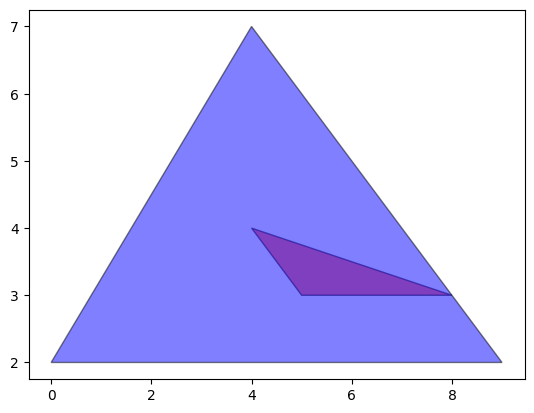

In [4]:
from matplotlib import pyplot as plt;
from matplotlib import patches
from shapely import geometry
import numpy as np;

# If SNAP is true, then only integer coordinates in [0,10] are taken
SNAP=True


# A helper function to plot a polygon. In python, you need to create and add a shape to an axis.
def plot_polygon(ax, poly, color):
    x, y = poly.exterior.coords.xy
    points = np.array([x, y], np.float32).T
    polygon_shape = patches.Polygon(points, linewidth=1, edgecolor='k', facecolor=color, alpha=0.5)
    ax.add_patch(polygon_shape)


# Calculate the 9-IM matrix as a matrix.
def de9im(geom1, geom2):
    return(np.array([x for x in geom1.relate(geom2)]).reshape(3,3))




# Plotting the polygon (ignoring inner rings)
# Create a random polygon
dt = np.float32
if SNAP:
    dt = np.int8

A = geometry.Polygon (
   np.random.uniform(0,10,6).reshape(-1,2).astype(dt) # create 3x2
)
B = geometry.Polygon (
   np.random.uniform(0,10,6).reshape(-1,2).astype(dt) # create 3x2
)


# This now creates a plot window and extracts the axis object (needed for polygon drawing)
fig, ax = plt.subplots(1)
# Draw both polygons
plot_polygon(ax, A,'r')
plot_polygon(ax, B,'b')

# Print some relational information
print(de9im(A,B))
print("Some Relations")
print("DE-9IM (String): %s" % A.relate(B))
print("WKT(A)        : %s" % (str(A)))
print("WKT(B)        : %s" % (str(B)))
print("A equals     B: %s" % A.equals  (B))
print("A contains   B: %s" % A.contains(B))
print("A crosses    B: %s" % A.crosses (B))
print("A disjoint   B: %s" % A.disjoint(B))
print("A intersects B: %s" % (A.intersects(B)))
print("A overlaps   B: %s" % (A.overlaps  (B)))
print("A touches    B: %s" % (A.touches   (B)))
print("A within     B: %s" % (A.within    (B)))


# zoom and show the plot
plt.axis("auto")
plt.show()

